# **Descriptive Statistics**

The objective of descriptive statistics is to summarize and explain the max and messy data as information or knowledge for decision-maker more easily to understand.

## **1. Fequency distribution**
The frequency distribution of each variable shown in each group.
* Qualitative data  
    * e.g. blood type, gender, car branch....  
    * Can shown by **bar chart**, **pie chart** or **Pareto chart**.

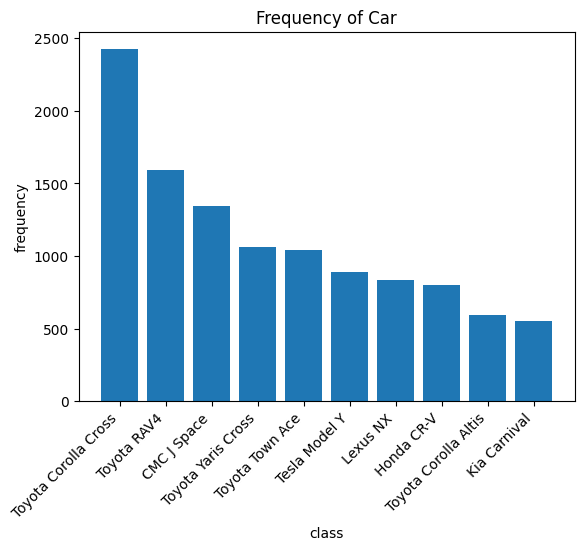

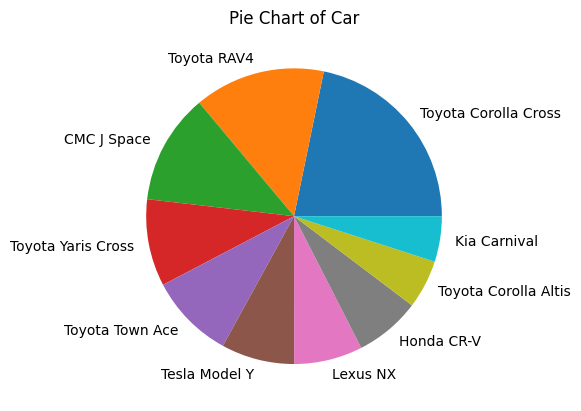

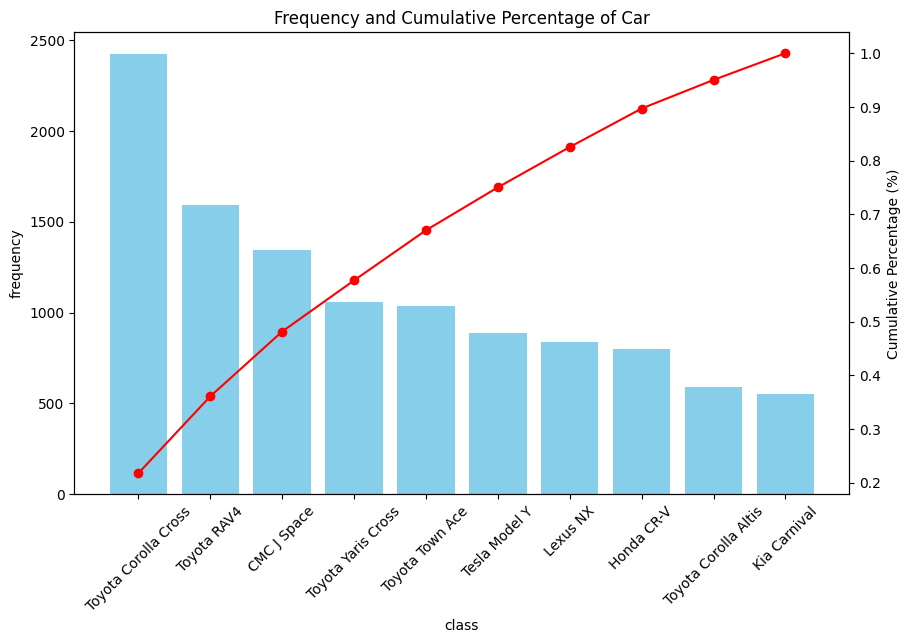

In [1]:
from sklearn.datasets import fetch_covtype
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load dataset
df = pd.DataFrame({'class':['Toyota Corolla Cross','Toyota RAV4','CMC J Space','Toyota Yaris Cross','Toyota Town Ace','Tesla Model Y','Lexus NX','Honda CR-V','Toyota Corolla Altis','Kia Carnival'],
                   'frequency': [2423, 1593, 1345, 1060, 1039,890,836,799,593,554]})


## bar chart
plt.bar(df['class'], df['frequency'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('class')
plt.ylabel('frequency')
plt.title('Frequency of Car')
plt.show()

## pie chart
plt.pie(df['frequency'], labels=df['class'])
plt.title('Pie Chart of Car')
plt.show()

## Pareto chart
df['percentage'] = [i/df['frequency'].sum() for i in df['frequency']]
cum = list()
for i in range(len(df)):
    cum.append(sum(list(df['percentage'][0:i+1])))
df['CumPrecentage'] = cum
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
ax1.bar(df['class'], df['frequency'], color='skyblue')
ax2.plot(df['class'], df['CumPrecentage'], color='red', marker='o', linestyle='-')
ax1.set_xlabel('class')
ax1.set_ylabel('frequency')
ax2.set_ylabel('Cumulative Percentage (%)')
ax1.set_title('Frequency and Cumulative Percentage of Car')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.show()


* Quantitative data  
    * e.g. population, height, weight...
    * Can shown by **histogram**, **pie chart**

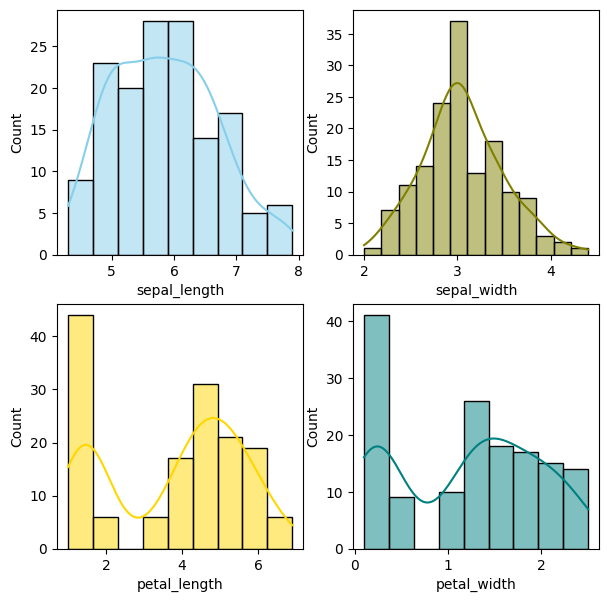

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# load iris dataset
iris = load_iris()
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target
iris_df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=iris_df, x="sepal_length", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=iris_df, x="sepal_width", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=iris_df, x="petal_length", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=iris_df, x="petal_width", kde=True, color="teal", ax=axs[1, 1])

plt.show()  

## **2. Measures of central tendancy**

* mean /average (gravity center of all data points)
    * usually use $\mu$ to represent statistical population mean.

        (1) $\sum_{i=1}^{N}X_i = N\mu_x$  
          
        (2) $\sum_{i=1}^{N}(X_i-\mu)=\sum_{i=1}^{N}X_i-\sum_{i=1}^{N}\mu=\sum_{i=1}^{N}X_i-N\mu_x=0$  
          
        (3) $\sum_{i=1}^{N}(X_i-\mu_x)^2\leq\sum_{i=1}^{N}(X_i-a)^2,\quad \forall a$  
          
    * susceptible to outliers
    * easy to calculate with algebra
    * a good representative of sampling distribution during infering

* median
    * usually use $\eta$ to represent median

        * $\sum_{i=1}^{N}|X_i-\eta|\leq\sum_{i=1}^{N}|X_i-a|,\quad \forall a$  

    * not susceptible to outliers
    * not sensitive to data changes
    * not easy to calculate with algebra

* mode
    * can be single, multiple or not exist.

    * the relation between mean, median and mode
        * symmetric distribution: $\mu=\eta=m_o$
        * asymmetric distribution
            * skewed to the right (positive skew): $\mu\geq\eta\geq m_o$
            * skewed to the left (negative skew): $\mu\leq\eta\leq m_o$

    * very robust to outliers
    * not sensitive to data changes
    not easy to calculate with algebra


mean:  -6.959487642478241e-05
median:  -7.933162146060278e-05
mode:  -0.009932430736044433
mean (-0.0) = median (-0.0) = mode (-0.01)


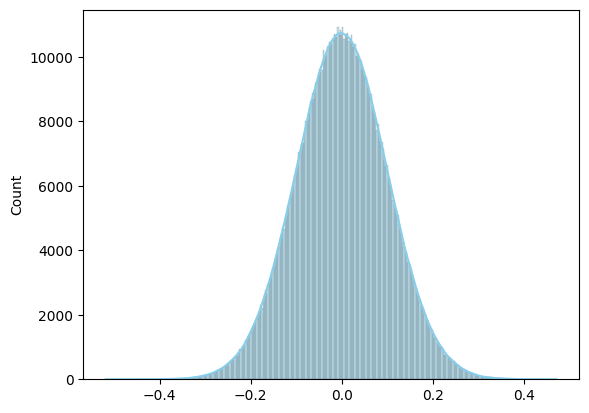

In [3]:
## symmetric distribution (normal distribution)

import statistics

s = np.random.normal(0, 0.1, 1000000)
sns.histplot(x=s, kde=True, color="skyblue")
print('mean: ',np.mean(s))
print('median: ',np.median(s))
print('mode: ',statistics.mode(s))
## due to randomness, there is slight difference
print(f'mean ({round(np.mean(s),2)}) = median ({round(np.median(s),2)}) = mode ({round(statistics.mode(s),2)})')

mean:  0.7870213643777022
median:  0.6623307401460656
mode:  1.6825363786022094
mean (0.79) > median (0.66) > mode (1.68)


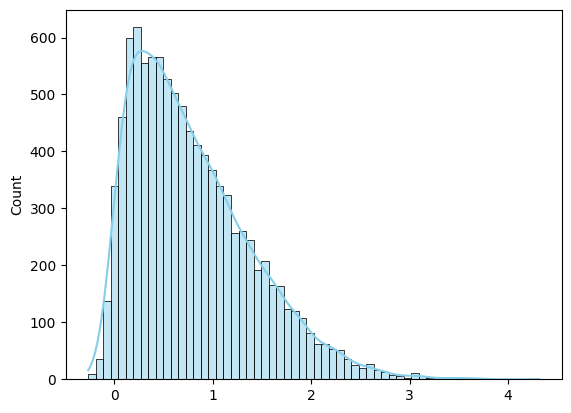

In [4]:
## positive skew

from scipy.stats import skewnorm
a=10
ps = skewnorm.rvs(a, size=10000)
sns.histplot(x=ps, kde=True, color="skyblue")
print('mean: ',np.mean(ps))
print('median: ',np.median(ps))
print('mode: ',statistics.mode(ps))
print(f'mean ({round(np.mean(ps),2)}) > median ({round(np.median(ps),2)}) > mode ({round(statistics.mode(ps),2)})')

mean:  -0.7779196380378232
median:  -0.6269563958669373
mode:  -1.3340426045046065
mean (-0.78) < median (-0.63) < mode (-1.33)


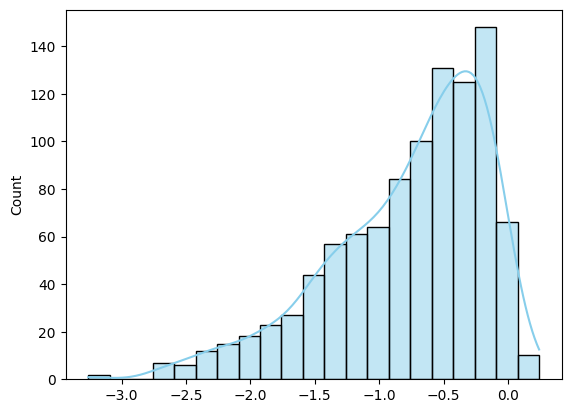

In [5]:
## negative skew

from scipy.stats import skewnorm
a=-10
ns = skewnorm.rvs(a, size=1000)
sns.histplot(x=ns, kde=True, color="skyblue")
print('mean: ',np.mean(ns))
print('median: ',np.median(ns))
print('mode: ',statistics.mode(ns))
print(f'mean ({round(np.mean(ns),2)}) < median ({round(np.median(ns),2)}) < mode ({round(statistics.mode(ns),2)})')

* geometric mean
    * $m_G = (\prod_{i=1}^{N}X_i)^{\frac{1}{N}}$
    * used for calcluating ratio, e.g. return ratio, growth ratio...

* harmonic mean
    * $m_H=\frac{N}{\sum_{i=1}^{N}\frac{1}{X_i}}$

## **3. Measure of dispersion/variability**

* variance
    * population variance
        * $\sigma^2=\frac{1}{N}\sum_{i=1}^{N}(X_i-\mu)^2$
    * sample variance
        * $S^2=\frac{1}{n-1}\sum_{i=1}^{n}(X_i-\overline{X})^2$
        * when we use $\overline{X}$ to estimate $\mu$ will lose one od degree of freedom(df) to be $n-1$, which can be proved that the $S^2$ after devided by $n-1$ is the unbias estimation.
    * methametical feature
        * when $\sigma=0$, $X_i=\mu,\ \forall\ i$
          
        * $N\sigma^2=\sum_{i=1}^{N}X_i^2-\frac{(\sum_{i=1}^{N}X_i)^2}{N}$, where $\frac{(\sum_{i=1}^{N}X_i)^2}{N}$ is called correct term.
          
        * $Y_i = X_i+b\implies \sigma_Y^2=\sigma_X^2$ 
          
        * $Y_i = aX_i \implies \sigma_Y^2=a^2\sigma_X^2$

* standard deviation (std)
    * population standard deviation: $\sigma$
    * sample standard deviation $S$

* coefficient of variance (CV)
    * population coefficient deviation $CV=\frac{\sigma}{\mu}\times 100%$
    * sample coefficient deviation $CV=\frac{S}{\overline{X}}\times 100%$